# Predicting the Price of House in Boston

Let us import some necessary packages first. Then we will read the the embedded dataset from sklearn.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_boston
dataset=load_boston()
X=dataset.data
y=dataset.target
print (X)
print (y)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

Let us see the name of features in the dataset. This may provide us with some imaginations and ideas. Meanwhile let us see the description towards the dataset.

In [4]:
print(dataset.feature_names)
print (dataset.DESCR)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-va

## EDA 

In [5]:
X=pd.DataFrame(X)
print (X.describe())

               0           1           2           3           4           5   \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

               6           7           8           9           10          11  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

PEARSON CORRELATION
          0         1         2         3         4         5         6   \
0   1.000000 -0.199458  0.404471 -0.055295  0.417521 -0.219940  0.350784   
1  -0.199458  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
2   0.404471 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
3  -0.055295 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
4   0.417521 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
5  -0.219940  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
6   0.350784 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
7  -0.377904  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
8   0.622029 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
9   0.579564 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
10  0.288250 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
11 -0.377365  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.27

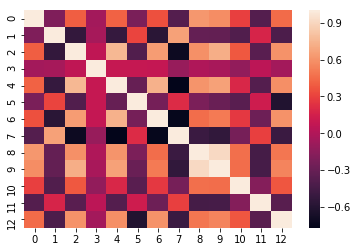

In [6]:
print("PEARSON CORRELATION")
print(X.corr(method="pearson"))
sns.heatmap(X.corr(method="pearson"))

          0         1         2         3         4         5         6   \
0   1.000000 -0.571586  0.735409  0.042337  0.820355 -0.310738  0.703673   
1  -0.571586  1.000000 -0.642811 -0.041937 -0.634828  0.361074 -0.544423   
2   0.735409 -0.642811  1.000000  0.089841  0.791189 -0.415301  0.679487   
3   0.042337 -0.041937  0.089841  1.000000  0.068426  0.058813  0.067792   
4   0.820355 -0.634828  0.791189  0.068426  1.000000 -0.310344  0.795153   
5  -0.310738  0.361074 -0.415301  0.058813 -0.310344  1.000000 -0.278082   
6   0.703673 -0.544423  0.679487  0.067792  0.795153 -0.278082  1.000000   
7  -0.744381  0.614627 -0.757080 -0.080248 -0.880015  0.263168 -0.801610   
8   0.726496 -0.278767  0.455507  0.024579  0.586429 -0.107492  0.417983   
9   0.728157 -0.371394  0.664361 -0.044486  0.649527 -0.271898  0.526366   
10  0.464386 -0.448475  0.433710 -0.136065  0.391309 -0.312923  0.355384   
11 -0.358463  0.163135 -0.285840 -0.039810 -0.296662  0.053660 -0.228022   
12  0.632969

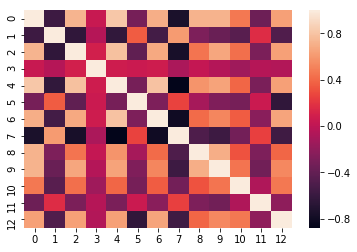

In [8]:
print(X.corr(method="spearman"))
sns.heatmap(X.corr(method="spearman"))

# Data Visualization 

# Training Regression Models

We will first use the train-test-split to divide the dataset as a training part and a test part.

In [10]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 9)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


Here we will introduce the Regression model comparison file. This file could help us to find the best regression model.

Linear: -23.801, 12.332
Lasso: -28.049, 10.755
ElasticNet: -27.173, 10.578
KNN: -42.705, 20.24
DecisionTree: -23.089, 9.324
SVR: -79.393, 22.498
AdaBoost: -13.888, 6.787
GradientBoost: -10.421, 5.189
RandomForest: -12.689, 6.444
ExtraTrees: -12.038, 7.882


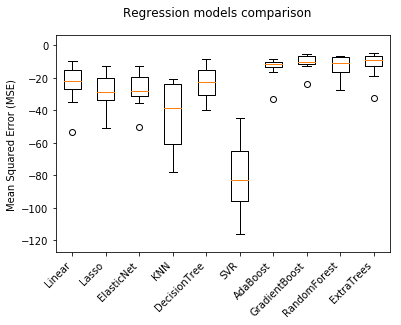

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

# user variables to tune
folds   = 10
metric  = "neg_mean_squared_error"

# hold different regression models in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["ExtraTrees"]    = ExtraTreesRegressor()

# 10-fold cross validation for each model
model_results = []
model_names   = []
for model_name in models:
	model   = models[model_name]
	k_fold  = KFold(n_splits=folds, random_state=9)
	results = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring=metric)
	
	model_results.append(results)
	model_names.append(model_name)
	print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

# box-whisker plot to compare regression models
figure = plt.figure()
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Squared Error (MSE)")
plt.margins(0.05, 0.1)
plt.show()

Via this, just pick the best regression model(GradientBoost) and continue the further prediction part.

9.455160771252912

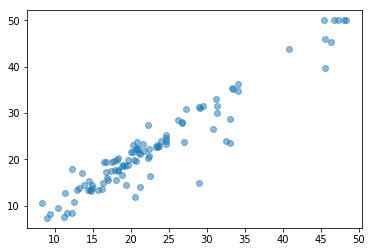

In [15]:
best_model=GradientBoostingRegressor()
best_model.fit(X_train,Y_train)
Y_predict=best_model.predict(X_test)

plt.scatter(Y_predict, Y_test, alpha=0.5)

from sklearn.metrics import mean_squared_error
mean_squared_error(Y_predict, Y_test)

From the graph we could notice that the line is approximately a y=x line. That means our prediction is excellent. We could also see that the RMSE score is 0.95, which is very small and very good.